In [58]:
import h5py as h5
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [45]:
path = '/home/sadat/Documents/DSE/Data/yogurt.h5'

##Analyze yogurt.h5 structure

In [46]:
data = h5.File(path)

def printname(name):   
    print(name)

data.visit(printname)

drug
drug/_i_table
drug/_i_table/index
drug/_i_table/index/abounds
drug/_i_table/index/bounds
drug/_i_table/index/indices
drug/_i_table/index/indicesLR
drug/_i_table/index/mbounds
drug/_i_table/index/mranges
drug/_i_table/index/ranges
drug/_i_table/index/sorted
drug/_i_table/index/sortedLR
drug/_i_table/index/zbounds
drug/table
groc
groc/_i_table
groc/_i_table/index
groc/_i_table/index/abounds
groc/_i_table/index/bounds
groc/_i_table/index/indices
groc/_i_table/index/indicesLR
groc/_i_table/index/mbounds
groc/_i_table/index/mranges
groc/_i_table/index/ranges
groc/_i_table/index/sorted
groc/_i_table/index/sortedLR
groc/_i_table/index/zbounds
groc/table
panel
panel/_i_table
panel/_i_table/index
panel/_i_table/index/abounds
panel/_i_table/index/bounds
panel/_i_table/index/indices
panel/_i_table/index/indicesLR
panel/_i_table/index/mbounds
panel/_i_table/index/mranges
panel/_i_table/index/ranges
panel/_i_table/index/sorted
panel/_i_table/index/sortedLR
panel/_i_table/index/zbounds
panel/ta

In [47]:
data.close()

##Panel data

In [48]:
df = pd.read_hdf(path, key='panel')

In [49]:
df.head()

,COLUPC,DOLLARS,IRI_KEY,MINUTE,OUTLET,PANID,UNITS,WEEK,file
0,17047000300,0.99,1097117,5068.0,DK,3138826,1.0,1514,yogurt_PANEL_DK_1479_1530.DAT
1,17047000302,0.89,1097117,2224.0,DK,3138826,1.0,1489,yogurt_PANEL_DK_1479_1530.DAT
2,17047000650,0.89,1097117,6551.0,DK,3138826,1.0,1488,yogurt_PANEL_DK_1479_1530.DAT
3,17047000650,2.97,1097117,6177.0,DK,3182048,3.0,1526,yogurt_PANEL_DK_1479_1530.DAT
4,17047001372,1.49,1097117,973.0,DK,3184911,1.0,1495,yogurt_PANEL_DK_1479_1530.DAT


####Missing data

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609107 entries, 0 to 15
Data columns (total 9 columns):
COLUPC     1609107 non-null int64
DOLLARS    1609107 non-null float64
IRI_KEY    1609107 non-null int64
MINUTE     520189 non-null float64
OUTLET     1609107 non-null object
PANID      1609107 non-null int64
UNITS      1609107 non-null float64
WEEK       1609107 non-null int64
file       1609107 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 122.8+ MB


MINUTE has missing data. Let's look at the values:

In [51]:
df[df['MINUTE'].isnull()].head()

,COLUPC,DOLLARS,IRI_KEY,MINUTE,OUTLET,PANID,UNITS,WEEK,file
0,13663200108,0.89,651444,NaN,DR,3307876,1.0,1119,yogurt_PANEL_DR_1114_1165.dat
1,13663200108,0.89,651444,NaN,DR,3333500,1.0,1148,yogurt_PANEL_DR_1114_1165.dat
2,13663200701,1.19,651444,NaN,DR,3109355,1.0,1150,yogurt_PANEL_DR_1114_1165.dat
3,13663200701,1.19,651444,NaN,DR,3807982,1.0,1151,yogurt_PANEL_DR_1114_1165.dat
4,13663200702,1.19,651444,NaN,DR,3805705,1.0,1151,yogurt_PANEL_DR_1114_1165.dat


It seems that the NaN MINUTE rows have DOLLARS information available, indicating that sales did take place.

Percentage of MINUTE NaN from each OUTLET:

In [52]:
df[df['MINUTE'].isnull()].groupby('OUTLET').count()['UNITS']/1609107*100

OUTLET
DR     0.012554
GR    67.329395
KK     0.049841
MA     0.280404
Name: UNITS, dtype: float64

It seems GR (Groceries) have 67% of its MINUTE data missing. The other outlets have less than 1% missing.

####Sales by time (MINUTE and WEEK)

In [62]:
def get_datetime(week, minute):
    week, minute = int(week), int(minute)
    # Reference orginal date is September 3, 1979
    ref_orginal = dt.date.toordinal(dt.date(1979, 9, 3))
    # Convert minutes to days, hours, minutes
    days, hours, mins = (minute / 1440), ((minute % 1440) / 60), ((minute % 1440) % 60)
    # Convert from ordinal.
    return dt.datetime.fromordinal(ref_orginal + (week - 1) * 7 + days).replace(
        hour=hours, minute=mins)

week = df['WEEK'].values
minute = df['MINUTE'].fillna(df['MINUTE'].median()).values
datetime = []

for w,m in zip(week,minute):
    datetime.append(get_datetime(w,m))

df['DATETIME']=datetime

In [63]:
df.head()

,COLUPC,DOLLARS,IRI_KEY,MINUTE,OUTLET,PANID,UNITS,WEEK,file,DATETIME
0,17047000300,0.99,1097117,5068.0,DK,3138826,1.0,1514,yogurt_PANEL_DK_1479_1530.DAT,2008-09-04 12:28:00
1,17047000302,0.89,1097117,2224.0,DK,3138826,1.0,1489,yogurt_PANEL_DK_1479_1530.DAT,2008-03-11 13:04:00
2,17047000650,0.89,1097117,6551.0,DK,3138826,1.0,1488,yogurt_PANEL_DK_1479_1530.DAT,2008-03-07 13:11:00
3,17047000650,2.97,1097117,6177.0,DK,3182048,3.0,1526,yogurt_PANEL_DK_1479_1530.DAT,2008-11-28 06:57:00
4,17047001372,1.49,1097117,973.0,DK,3184911,1.0,1495,yogurt_PANEL_DK_1479_1530.DAT,2008-04-21 16:13:00


Based on the spikes, we can tell that yogurt sales are higher during certain times of the day.

Now analyzing based on Years:

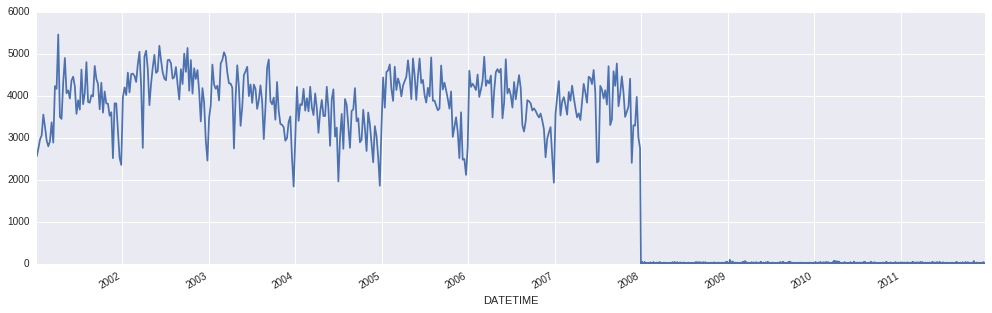

In [76]:
plt.figure(figsize=(17,5))
df.groupby('DATETIME')['DOLLARS'].sum().plot();

It seems yogurt sales dropped after 2008. Let's analyze before 2008:

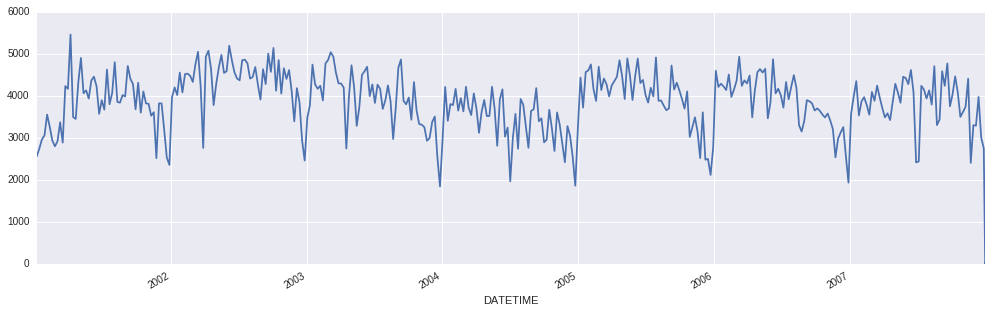

In [75]:
plt.figure(figsize=(17,5))
df[df['DATETIME']<dt.datetime(year=2008, month=1, day=1)].groupby('DATETIME')['DOLLARS'].sum().plot();

It seems that yogurt sales are higher at the begninning of the year compared to the end of the year.

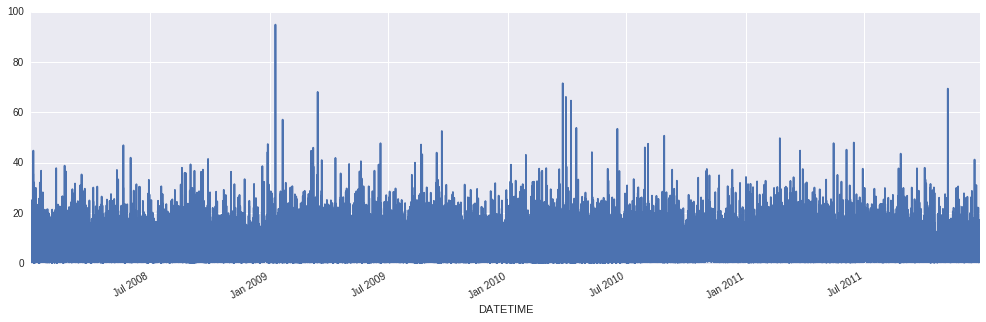

In [74]:
plt.figure(figsize=(17,5))
df[df['DATETIME']>dt.datetime(year=2008, month=1, day=1)].groupby('DATETIME')['DOLLARS'].sum().plot();

While there are spikes in sales of yogurt after 2008, there are no observable pattern.

Now let's look at our data by MINUTE to decipher what happens each week:

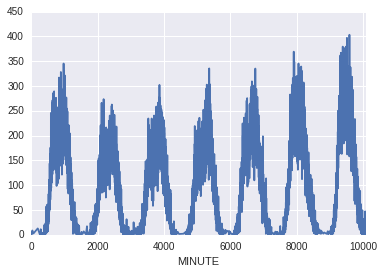

In [83]:
df.dropna().groupby('MINUTE')['DOLLARS'].sum().plot();

It seems that througout the week, people have yogurt cravings during particular times of the day. Let's dive deeper to see what happens each day:

In [79]:
def get_weektime(week, minute):
    week, minute = int(week), int(minute)
    # Reference orginal date is September 3, 1979
    ref_orginal = dt.date.toordinal(dt.date(1979, 9, 3))
    # Convert minutes to days, hours, minutes
    days, hours, mins = (minute / 1440), ((minute % 1440) / 60), ((minute % 1440) % 60)
    # Convert from ordinal.
    return dt.datetime.fromordinal(ref_orginal).replace(
        hour=hours, minute=mins)

week = df['WEEK'].values
minute = df['MINUTE'].fillna(df['MINUTE'].median()).values
datetime = []

for w,m in zip(week,minute):
    datetime.append(get_weektime(w,m))

df['WEEKTIME']=datetime

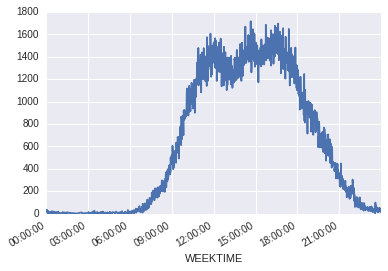

In [80]:
df.dropna().groupby('WEEKTIME')['DOLLARS'].sum().plot();

It seems that yogurt sales are at their highest between 12pm - 6pm.

####Sales by OUTLET

In [71]:
df.groupby('OUTLET')['DOLLARS'].sum()

OUTLET
DK     4.141000e+01
DR     3.092600e+02
GK     8.666978e+05
GR     1.410725e+06
KK     4.951500e+02
MA     4.816450e+03
MK     3.501300e+02
Name: DOLLARS, dtype: float64

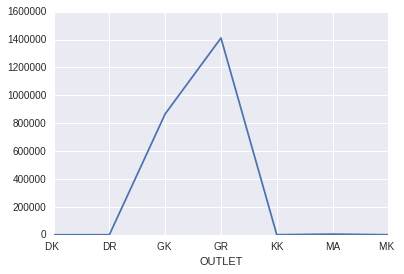

In [13]:
df.groupby('OUTLET')['DOLLARS'].sum().plot();

GK and GR have the greatest sales. Other outlets have insignificant sales in relation.

####Conclusion

- We have a lot of NaNs in MINUTE, specifically from GR outlets.
- Between 1979-2008, people used to buy yogurt more during the beginning of the year and comparatively less throughout the year.
- Yogurt sales dropped abruptly after 2008.
- People generally buy yogurt between 12pm - 6pm.
- GR and GK have the highest yogurt sales among all outlets.